In [126]:
wine = pd.read_csv('data/winemag-data-130k-v2.csv.zip')
wine.head()[:3]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [127]:
wine = pd.read_csv('data/winemag-data-130k-v2.csv.zip', index_col=0)

#removed index column from the csv file

In [123]:
#wine.shape

(60605, 16)

In [128]:
wine.head()[:2]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


#### Removed entries with duplicate Description and Title. These duplicates are assumed to be same wine entered twice in the dataset

In [129]:
wine[wine.duplicated(['description','title'])].shape[0]
#9983 descriptions are duplicates

9983

In [130]:
wine = wine.drop_duplicates(['description','title'])
wine.shape

(119988, 13)

In [131]:
wine.isnull().sum().sort_values(ascending=False) / wine.shape[0] * 100

#Percentage of null values in each column

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
province                  0.049172
country                   0.049172
variety                   0.000833
winery                    0.000000
title                     0.000000
points                    0.000000
description               0.000000
dtype: float64

In [132]:
#wine.info()
wine.isnull().sum().sort_values(ascending=False) / wine.shape[0] * 100

region_2                 61.021936
designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
region_1                 16.301630
price                     6.996533
province                  0.049172
country                   0.049172
variety                   0.000833
winery                    0.000000
title                     0.000000
points                    0.000000
description               0.000000
dtype: float64

### Dealing with Null Values - observations

##### Region_2 is the largest amount of null values in a column
##### Looking at Title of wines appears the missing region values are included in the Title in between parentheses ex: Spyro 2014 Albariño (Rías Baixas)
##### Title column also has useful information to pull out year of the wine



In [133]:
region_df = wine[(wine['region_1']) != (wine['region_2'])]
region_df.shape[0]

115123

In [134]:
region_df.tail()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [135]:
def name_split(string):
   brian = string.split(sep='(')
   brian1 = brian[-1].split(sep=')')
   return brian1[0]
wine['region'] = wine['title'].map(name_split)
wine.head()

#replaced region_1 and region_2 columns with single region column with 'Region name' pulled from title feature

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,region
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,Etna
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Douro
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Willamette Valley
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,Lake Michigan Shore
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Willamette Valley


In [136]:
region_df = wine[(wine['region_1']) != (wine['region_2'])]
region_df.shape[0]

115123

In [137]:
wine = wine.drop('region_2',axis=1)


#### Also dropping region_1 feature. To eliminate all null region values

In [138]:
wine = wine.drop('region_1',axis=1)

In [139]:
wine.isnull().sum().sort_values(ascending=False) / wine.shape[0] * 100

designation              28.790379
taster_twitter_handle    24.540787
taster_name              20.766243
price                     6.996533
province                  0.049172
country                   0.049172
variety                   0.000833
region                    0.000000
winery                    0.000000
title                     0.000000
points                    0.000000
description               0.000000
dtype: float64

In [140]:
wine['variety'].isnull().value_counts()

False    119987
True          1
Name: variety, dtype: int64

In [141]:
wine['variety'].fillna(value = 'Unknown', inplace=True)

In [142]:
wine['country'].isnull().value_counts()

False    119929
True         59
Name: country, dtype: int64

In [143]:
wine['country'].fillna(value = 'Unknown', inplace=True)
wine['country'].isnull().value_counts()

False    119988
Name: country, dtype: int64

In [144]:
wine = wine.dropna(subset=['price'])

wine = wine.dropna(subset=['designation'])

In [145]:
wine = wine.dropna(subset=['taster_twitter_handle'])

In [146]:
wine['variety'].isnull().value_counts()

False    60605
Name: variety, dtype: int64

In [147]:
wine['variety'].fillna(value = 'Unknown', inplace=True)

In [148]:
wine['country'].isnull().value_counts()

False    60605
Name: country, dtype: int64

In [149]:
wine['country'].fillna(value = 'Unknown', inplace=True)
wine['country'].isnull().value_counts()

False    60605
Name: country, dtype: int64

In [150]:
wine['province'].fillna(value = 'Unknown', inplace=True)

In [151]:
wine.isnull().sum().sort_values(ascending=False)

region                   0
winery                   0
variety                  0
title                    0
taster_twitter_handle    0
taster_name              0
province                 0
price                    0
points                   0
designation              0
description              0
country                  0
dtype: int64

In [186]:
wine['quality'] = wine['points'].map(lambda x: 1 if x>87.5 else 0)
#including quality column to classify wines as good or bad

In [153]:
#wine['country'].value_counts()[:10].plot(kind='bar',rot=40)
#plt.show()

#largest 10 wine producers in this dataset

In [154]:
wine['title'] = wine['title'].astype(str)

In [155]:
wine['year'] = wine.title.str.extract(r'(\d{4})')

In [156]:
wine['year'].head()

1    2011
4    2012
5    2011
6    2013
9    2012
Name: year, dtype: object

In [157]:
from datetime import datetime
wine['year'] = pd.to_datetime(wine.year, errors = 'coerce')
wine.info()
wine['year']= wine.year.dt.year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60605 entries, 1 to 129970
Data columns (total 13 columns):
country                  60605 non-null object
description              60605 non-null object
designation              60605 non-null object
points                   60605 non-null int64
price                    60605 non-null float64
province                 60605 non-null object
taster_name              60605 non-null object
taster_twitter_handle    60605 non-null object
title                    60605 non-null object
variety                  60605 non-null object
winery                   60605 non-null object
region                   60605 non-null object
year                     57896 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 6.5+ MB


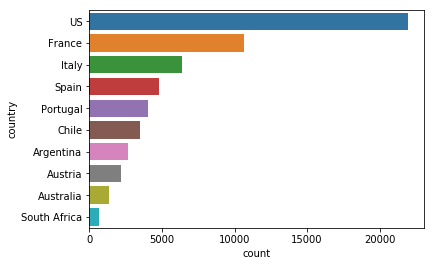

In [187]:
df = wine[wine.country.isin(wine.country.value_counts().head(10).index)]
ax = sns.countplot(y='country', data = df, order= wine['country'].value_counts().head(10).index)
plt.show()

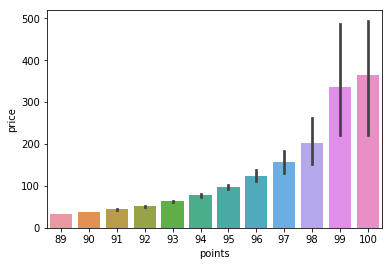

In [158]:
ax = sns.barplot(x="points", y="price", data=wine[wine['points']>88.5])

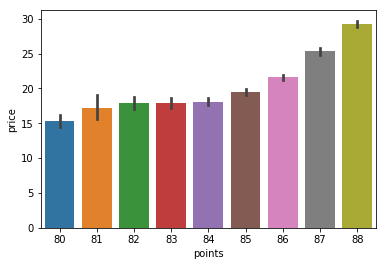

In [159]:
ax = sns.barplot(x="points", y="price", data=wine[wine['points']<88.5])

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/brianlouie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 360x360 with 0 Axes>

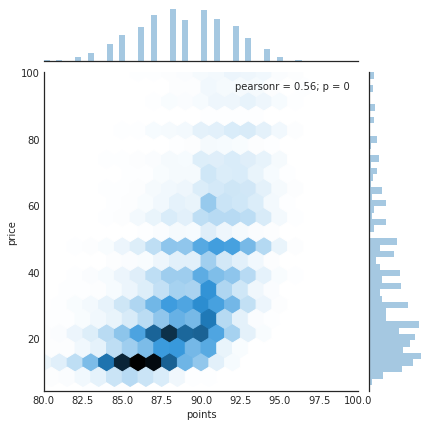

In [161]:
plt.figure(figsize=(5,5))
with sns.axes_style('white'):
    sns.jointplot(x='points', y='price', data= wine[wine['price'] <= 100] , kind='hex', gridsize=20)

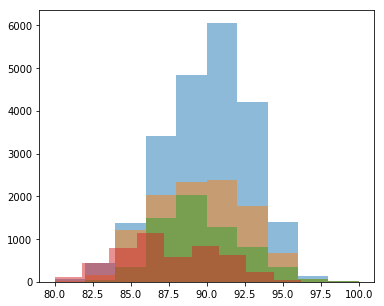

In [250]:
plt.figure(figsize = (6, 5))

plt.hist(data = wine[wine['country']=='US'], x='points', alpha=0.5)
plt.hist(data = wine[wine['country']=='France'], x='points', alpha=0.5)
plt.hist(data = wine[wine['country']=='Italy'], x='points', alpha=0.5)
plt.hist(data = wine[wine['country']=='Spain'], x='points', alpha=0.5)

plt.show()

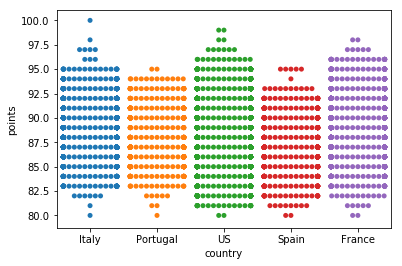

In [53]:
wine_swarm = wine[wine['country'].isin(['US','France','Spain','Italy','Portugal'])][:10000]
sns.swarmplot(x="country", y="points", data=wine_swarm)


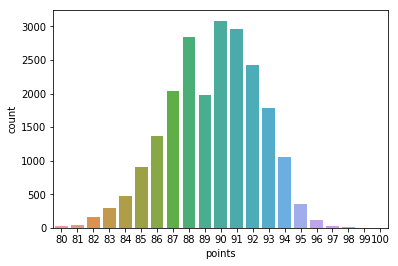

In [162]:
sns.countplot(data = wine[wine['country'] =='US'], x='points')
sns.countplot(data = wine[wine['country'] =='France'], x='points') 
plt.show()

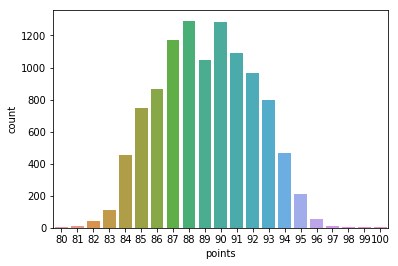

In [251]:
sns.countplot(data = wine[wine['country'] =='France'], x='points') 
plt.show()

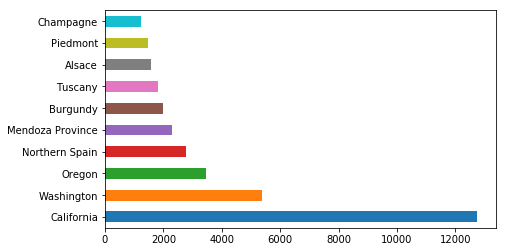

In [164]:
wine['province'].value_counts()[:10].plot(kind='barh',figsize=(7,4))
plt.show()

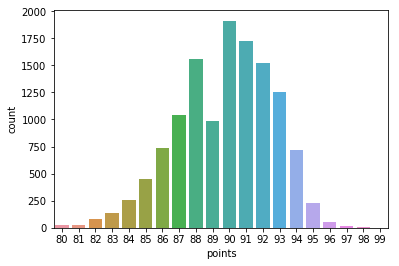

In [165]:
sns.countplot(data = wine[wine['province'] =='California'], x='points')
plt.show()

In [166]:
#wine[wine['country']=='US']['province'].value_counts()[:5].plot(kind='barh')
#plt.show()

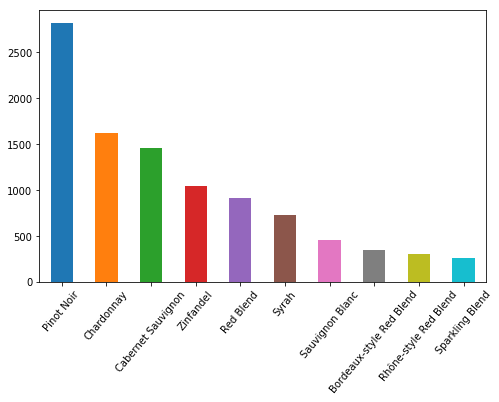

In [167]:
wine[wine['province']=='California']['variety'].value_counts()[:10].plot(kind='bar', figsize = (8,5), rot=50)
plt.show()

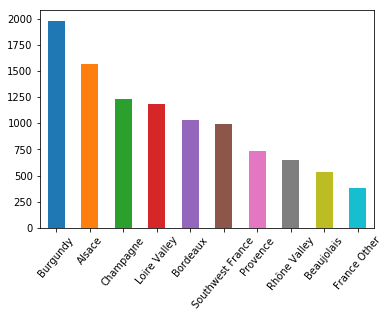

In [168]:
wine[wine['country']=='France']['province'].value_counts()[:10].plot(kind='bar',rot=50)
plt.show()

In [169]:
wine.variety.value_counts()[:10]

Pinot Noir                  6706
Red Blend                   5058
Chardonnay                  4976
Cabernet Sauvignon          3609
Syrah                       2145
Bordeaux-style Red Blend    2137
Sauvignon Blanc             2096
Riesling                    1918
Portuguese Red              1903
Rosé                        1809
Name: variety, dtype: int64

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


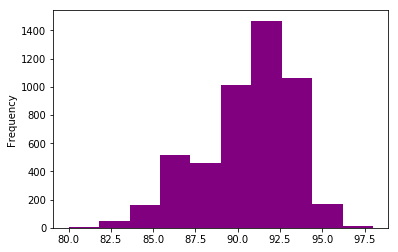

In [170]:
US_pinotnoir = wine[wine['country'] == 'US'][wine['variety']== 'Pinot Noir']
US_pinotnoir['points'].plot(kind='hist', color = 'purple')
plt.show()

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


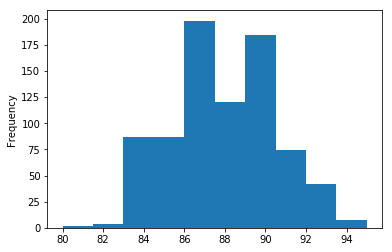

In [171]:
Fra_pinotnoir = wine[wine['country'] == 'France'][wine['variety']== 'Bordeaux-style Red Blend']
Fra_pinotnoir['points'].plot(kind='hist')

In [172]:
ita_pinotnoir = wine[wine['country'] == 'Italy'][wine['variety']== 'Pinot Noir']
esp_pinotnoir = wine[wine['country'] == 'Spain'][wine['variety']== 'Pinot Noir']

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/brianlouie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Text(0.5,1,'France Pinot Noir Wine Mag rankings')

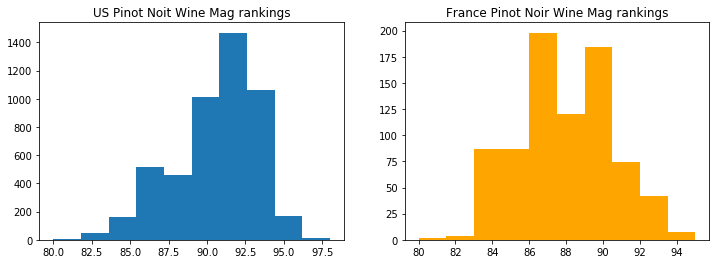

In [173]:
plt.figure(figsize = (12, 4))

plt.subplot(1,2,1)
plt.hist(US_pinotnoir['points'])
plt.title('US Pinot Noit Wine Mag rankings')

plt.subplot(1,2,2)
plt.hist(Fra_pinotnoir['points'], color = 'orange')
plt.title('France Pinot Noir Wine Mag rankings')


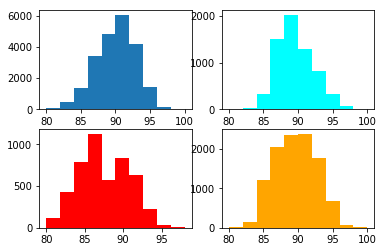

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=2)


plt.subplot(2,2,1)
us_rating = wine[wine['country']== 'US']['points']
plt.hist(us_rating)

plt.subplot(2,2,2)
ita_rating = wine[wine['country']== 'Italy']['points']
plt.hist(ita_rating, color='aqua')

plt.subplot(2,2,3)
esp_rating = wine[wine['country']== 'Spain']['points']
plt.hist(esp_rating, color='red')

plt.subplot(2,2,4)
fra_rating = wine[wine['country']== 'France']['points']
plt.hist(fra_rating, color='orange')

plt.show()

In [252]:
wine.points.describe()

count    60605.000000
mean        88.866282
std          3.040555
min         80.000000
25%         87.000000
50%         89.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [175]:
wine[wine['points'] > 88.5].shape
#good wines - any wine above median value of ratings

(32660, 13)

In [176]:
wine[wine['points'] < 88.5].shape
#bad wines - in bottom half of ratings

(27945, 13)

In [177]:
tasters = wine['taster_name'].value_counts()
len(tasters)

16

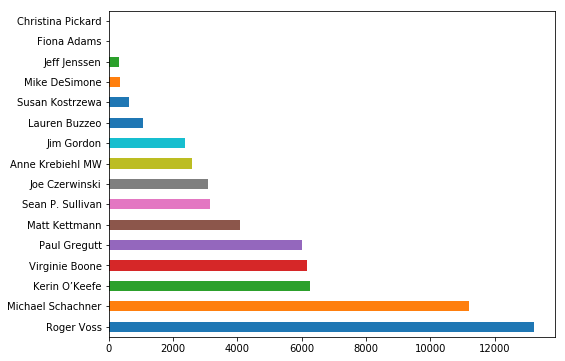

In [242]:
plt.figure(figsize=(8,6))
tasters.plot(kind='barh')
plt.show()

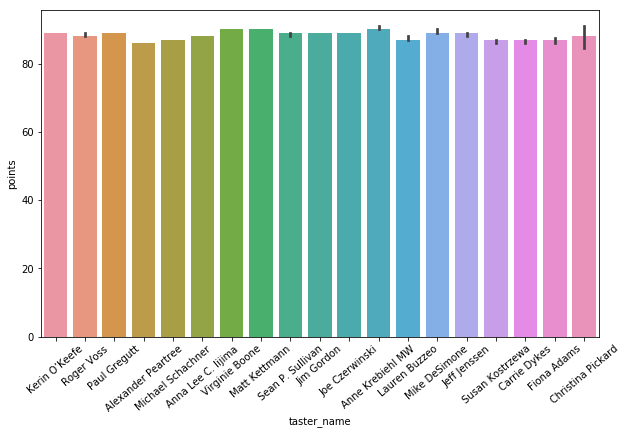

In [37]:
plt.figure(figsize=(10,6))
from numpy import median
ax = sns.barplot(x = 'taster_name', y='points', data=wine , estimator=median)
 
for item in ax.get_xticklabels():
    item.set_rotation(40)

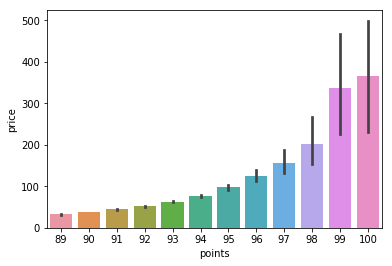

In [179]:
ax = sns.barplot(x="points", y="price", data=wine[wine['points']>88.5])

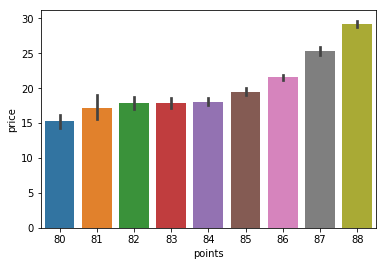

In [180]:
ax = sns.barplot(x="points", y="price", data=wine[wine['points']<88.5])

In [181]:
from datetime import datetime
wine['year'] = pd.to_datetime(wine.year, errors = 'coerce')
wine.info()
wine['year']= wine.year.dt.year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60605 entries, 1 to 129970
Data columns (total 13 columns):
country                  60605 non-null object
description              60605 non-null object
designation              60605 non-null object
points                   60605 non-null int64
price                    60605 non-null float64
province                 60605 non-null object
taster_name              60605 non-null object
taster_twitter_handle    60605 non-null object
title                    60605 non-null object
variety                  60605 non-null object
winery                   60605 non-null object
region                   60605 non-null object
year                     57896 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 9.0+ MB


In [244]:
#ax = sns.barplot(x="year", y="price", data=wine[wine['year']>2008])

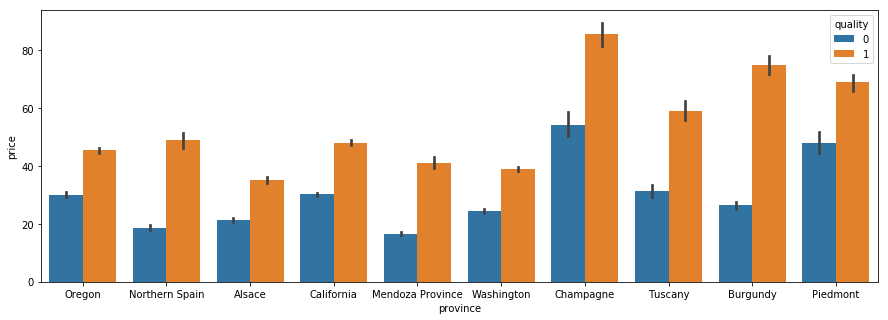

In [188]:
df_province = wine[wine.province.isin(wine.province.value_counts().head(10).index)]

plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'province', y='price', hue='quality', data = df_province)

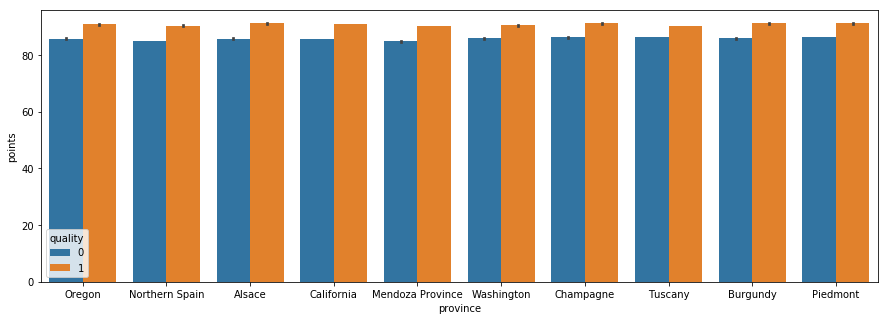

In [245]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'province', y='points', hue='quality', data = df_province)

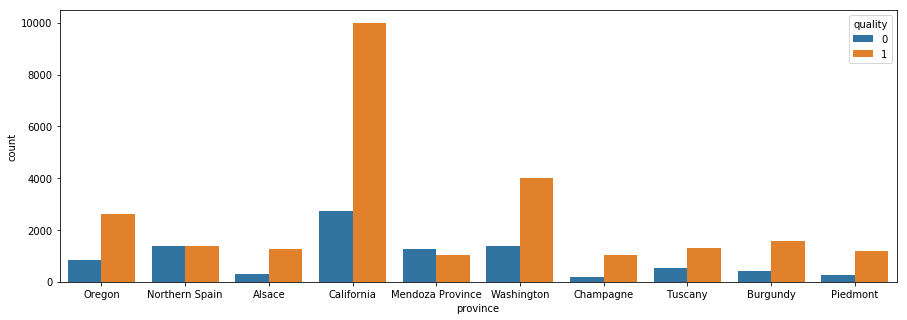

In [189]:
plt.figure(figsize=(15,5))
sns.countplot(x='province', hue='quality', data = df_province)

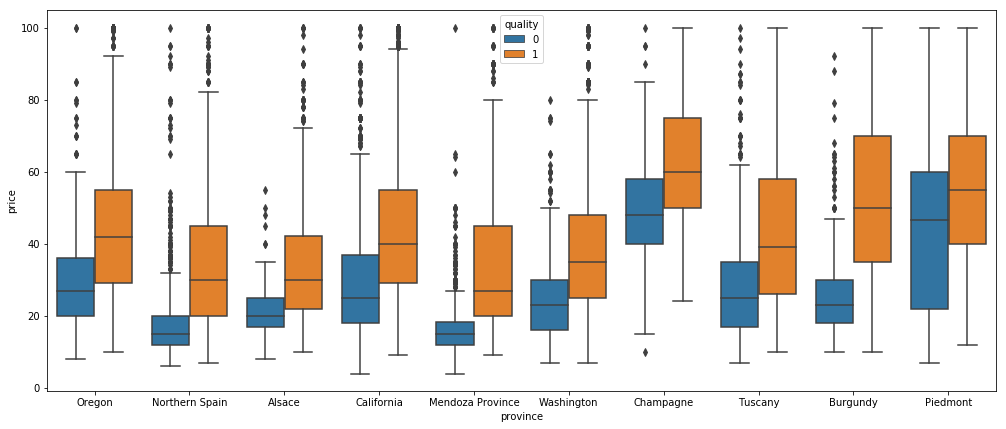

In [190]:
plt.figure(figsize=(17,7))
sns.boxplot(x='province', y='price', hue='quality', data = df_province[df_province['price']<=100])

### Working with NLP and textblob on wine description 

In [191]:
from nltk.tokenize import word_tokenize
import nltk

import re

In [192]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [193]:
def subjectivity_calc(text):
    try:
        return TextBlob(text).sentiment.subjectivity
    except:
        return None

In [194]:
wine['polarity'] = wine['description'].apply(polarity_calc)
wine['subjectivity'] = wine['description'].apply(subjectivity_calc)

In [195]:
wine[['polarity', 'subjectivity']].describe()

,polarity,subjectivity
count,60605.000000,60605.000000
mean,0.148850,0.485004
std,0.169962,0.150903
min,-0.800000,0.000000
25%,0.033333,0.393939
50%,0.146667,0.487500
75%,0.258333,0.580000
max,1.000000,1.000000


In [197]:
#wine['quality'] = wine['points'].map(lambda x: 1 if x>87.5 else 0)


In [198]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [199]:
vect = TfidfVectorizer(stop_words='english', lowercase = True)

In [200]:
wine_sample = wine.description[:12000]
X= vect.fit_transform(wine_sample)

In [201]:
wineX = X.toarray()

In [202]:
wine_vocab = vect.get_feature_names()
wine_words = pd.DataFrame(wineX, columns = wine_vocab)
wine_words.head()

,000,04,05,06,07,08,080,09,10,100,...,zotovich,zucca,zuccardi,zull,zweigelt,àn,émilion,étoile,über,überbest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
reg_test = pd.concat([wine.quality , wine_words],axis=1)

In [204]:
reg_test = reg_test.dropna()

In [205]:
reg_test.shape

(6114, 11994)

In [207]:
reg_test.head()[:3]

,quality,000,04,05,06,07,08,080,09,10,...,zotovich,zucca,zuccardi,zull,zweigelt,àn,émilion,étoile,über,überbest
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [209]:
lasso_clf = Lasso(alpha = 2.0)
select = SelectFromModel(lasso_clf, threshold = 0.50)

In [210]:
X = reg_test.drop('quality',axis=1)
y = reg_test.quality

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.50)

In [212]:
select.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=0.5)

In [213]:
X_train_l1 = select.transform(X_train)

/Users/brianlouie/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(StandardScaler(), LinearRegression())
degrees = {'polynomialfeatures__degree': [i for i in range(1, 5)]}

grid = GridSearchCV(pipe, param_grid=degrees)

In [84]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1)

In [233]:
wine.describe()

,points,price,year,quality,polarity,subjectivity
count,60605.000000,60605.000000,57896.0,60605.000000,60605.000000,60605.000000
mean,88.866282,37.369276,1970.0,0.665160,0.148850,0.485004
std,3.040555,37.202405,0.0,0.471939,0.169962,0.150903
min,80.000000,4.000000,1970.0,0.000000,-0.800000,0.000000
25%,87.000000,18.000000,1970.0,0.000000,0.033333,0.393939
50%,89.000000,28.000000,1970.0,1.000000,0.146667,0.487500
75%,91.000000,45.000000,1970.0,1.000000,0.258333,0.580000
max,100.000000,2013.000000,1970.0,1.000000,1.000000,1.000000


In [239]:
X = wine[['points', 'price','polarity','subjectivity']]
y = wine.quality
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.50)

In [240]:
select.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=0.5)

In [241]:
select.get_support()

array([False, False, False, False])

In [214]:

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('[a-zA-Z]\w+')
from nltk.tokenize import WordPunctTokenizer

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [215]:
wine_sample = wine.description[:12000]
wine_tokens = [] 
for string in wine_sample:
    wine_tokens.append(tokenizer.tokenize(string))
#tokenizer.tokenize(wine_sample)
#tokens

In [216]:
wine_list = sum(wine_tokens, [])


In [217]:
words = []
for word in wine_list:
    words.append(word.lower())

In [218]:
wine_wordin = [w for w in words if not w in stop_words]
print(wine_wordin[:100])

['ripe', 'fruity', 'wine', 'smooth', 'still', 'structured', 'firm', 'tannins', 'filled', 'juicy', 'red', 'berry', 'fruits', 'freshened', 'acidity', 'already', 'drinkable', 'although', 'certainly', 'better', 'much', 'like', 'regular', 'bottling', 'comes', 'across', 'rather', 'rough', 'tannic', 'rustic', 'earthy', 'herbal', 'characteristics', 'nonetheless', 'think', 'pleasantly', 'unfussy', 'country', 'wine', 'good', 'companion', 'hearty', 'winter', 'stew', 'blackberry', 'raspberry', 'aromas', 'show', 'typical', 'navarran', 'whiff', 'green', 'herbs', 'case', 'horseradish', 'mouth', 'fairly', 'full', 'bodied', 'tomatoey', 'acidity', 'spicy', 'herbal', 'flavors', 'complement', 'dark', 'plum', 'fruit', 'finish', 'fresh', 'grabby', 'bright', 'informal', 'red', 'opens', 'aromas', 'candied', 'berry', 'white', 'pepper', 'savory', 'herb', 'carry', 'palate', 'balanced', 'fresh', 'acidity', 'soft', 'tannins', 'great', 'depth', 'flavor', 'fresh', 'apple', 'pear', 'fruits', 'touch', 'spice', 'dry', 

In [219]:
wine_text = nltk.Text(wine_wordin)
fdist = nltk.FreqDist(wine_text)
type(fdist)

nltk.probability.FreqDist

In [220]:
fdist.most_common(10)

[('wine', 7329),
 ('flavors', 5920),
 ('fruit', 4818),
 ('aromas', 4443),
 ('palate', 4349),
 ('finish', 3727),
 ('acidity', 3207),
 ('drink', 3074),
 ('black', 3039),
 ('tannins', 2789)]

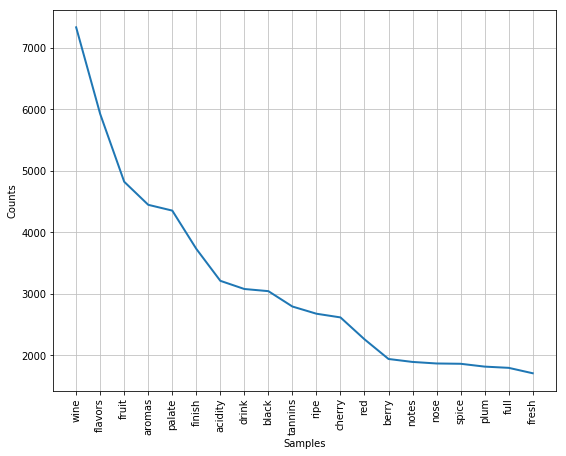

In [221]:
plt.figure(figsize = (9, 7))
fdist.plot(20)

In [224]:
cali_top20 = wine[wine['province']=='California']['region'].value_counts()[:20]
cali_top20 = pd.DataFrame(cali_top20)
cali_top20 = cali_top20.reset_index()
cali_top20.columns = ['region_name', 'region_count']
cali_top20

,region_name,region_count
0,Russian River Valley,1175
1,Napa Valley,1046
2,Paso Robles,838
3,Sonoma Coast,561
4,California,533
5,Sta. Rita Hills,474
6,Lodi,426
7,Anderson Valley,311
8,Santa Lucia Highlands,307
9,Carneros,304


In [222]:
import geopy
import geopandas
import geocoder
import googlemaps
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [227]:
geolocator = Nominatim(user_agent="MyGA_project")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [226]:
cali_top20['location'] = cali_top20['region_name'].apply(geocode)
cali_top20['point'] = cali_top20['location'].apply(lambda loc: list(loc.point) if loc else None)


In [228]:
def long_lat(lst):
    lst.pop(2)
    return lst
    

In [231]:
cali_top20['real_point'] = cali_top20['point'].apply(long_lat)


In [230]:
cali_top20.head()

,region_name,region_count,location,point
0,Russian River Valley,1175,"(Russian River, Mendocino County, California, ...","[38.9028592, -123.0581113]"
1,Napa Valley,1046,"(名賢居 Napa Valley, 藍地 Lam Tei, 麒麟圍 Kei Lun Wai,...","[22.41124455, 113.980393164403]"
2,Paso Robles,838,"(Paso Robles, San Luis Obispo County, Californ...","[35.6267654, -120.6912456]"
3,Sonoma Coast,561,"(Coast Guard Training Center Petaluma, Two Roc...","[38.2481125, -122.786881081212]"
4,California,533,"(California, United States of America, (36.701...","[36.7014631, -118.7559974]"


In [231]:
import folium

In [233]:
cali_top20.point[1]

[38.9028592, -123.0581113]

In [234]:
m = folium.Map(location= cali_top20.point[1])

In [235]:
m